In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
951,2020-07-11,United Kingdom,288628.0,288133.0,44771.0,44650.0,495.0,121.0
952,2020-07-11,Germany,198684.0,198556.0,9074.0,9060.0,128.0,14.0
953,2020-07-11,Iran,253953.0,252720.0,12441.0,12447.0,1233.0,-6.0
954,2020-07-11,Turkey,210955.0,210965.0,5321.0,5323.0,-10.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2800.60460251046
RMSE =  6805.483782403151


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  303.4958158995816
RMSE =  702.2872747800516


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  14045.645161290322
RMSE =  17990.395985349445
-- World performances for deaths --
MAE =  1561.4301075268818
RMSE =  1900.707120821034


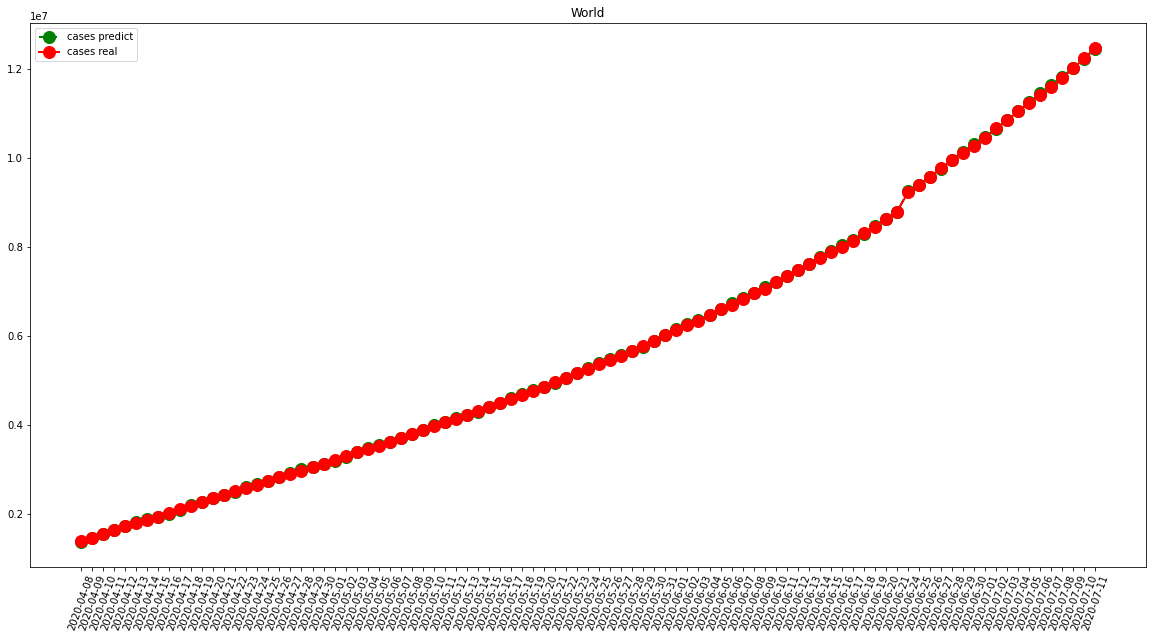

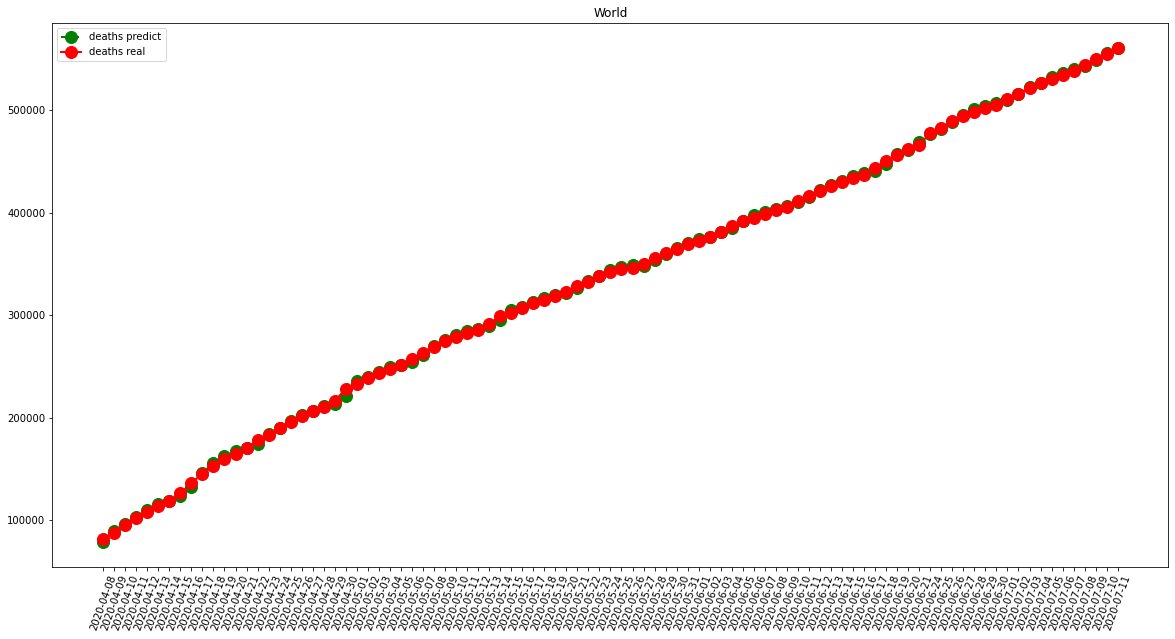

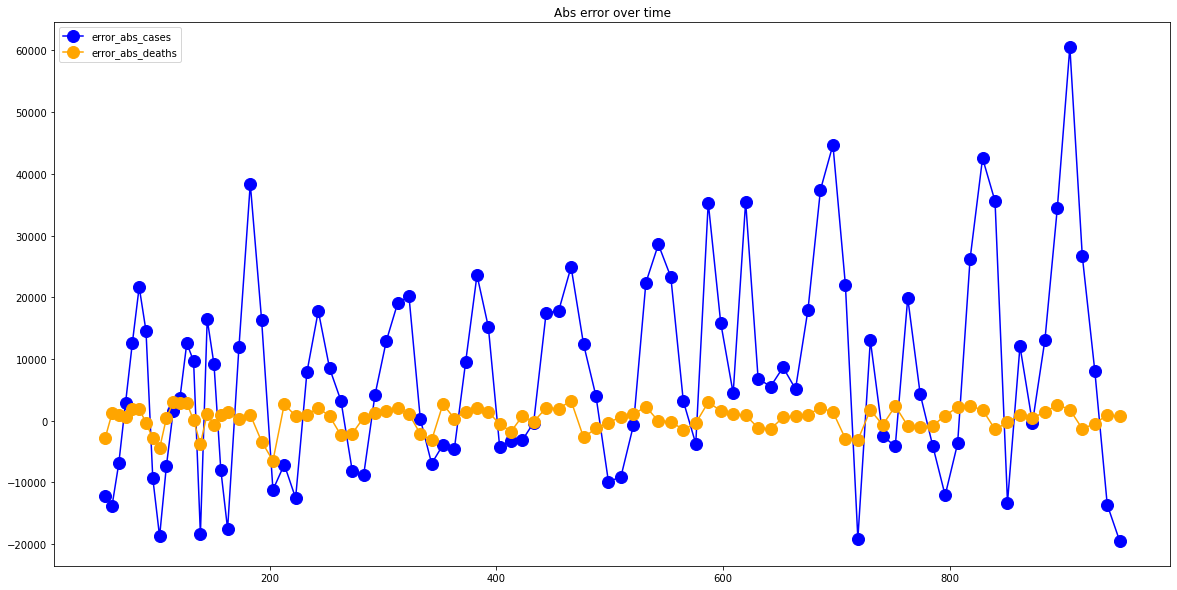

In [7]:
visShow("World")

-- France performances for cases --
MAE =  858.8252427184466
RMSE =  1428.6017707596038
-- France performances for deaths --
MAE =  171.5631067961165
RMSE =  330.0393474629751


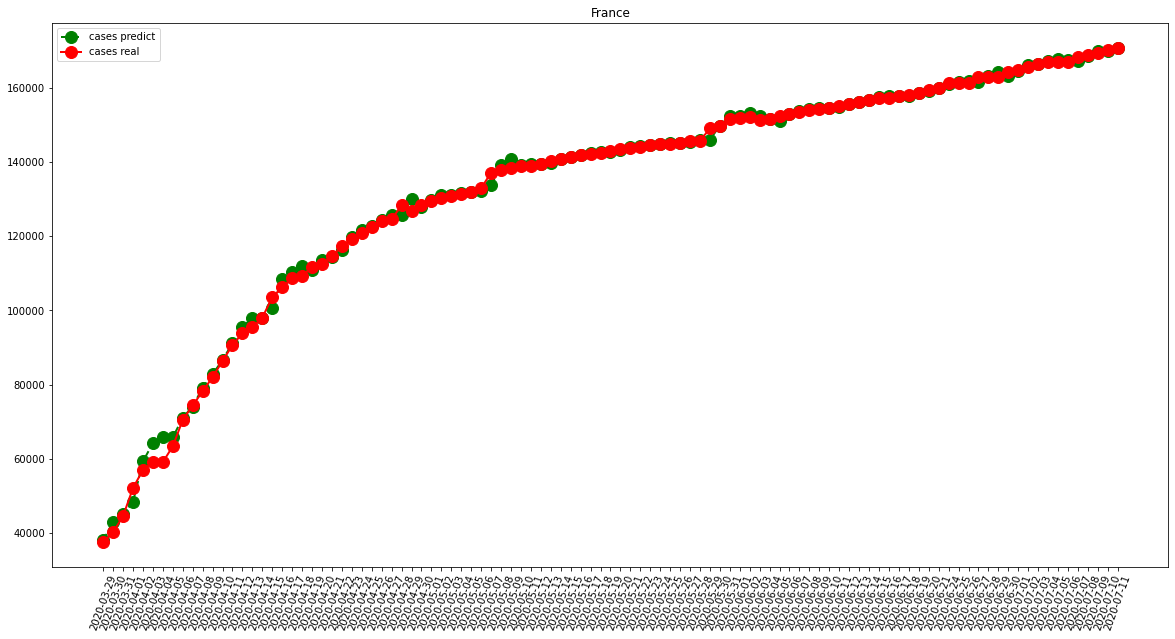

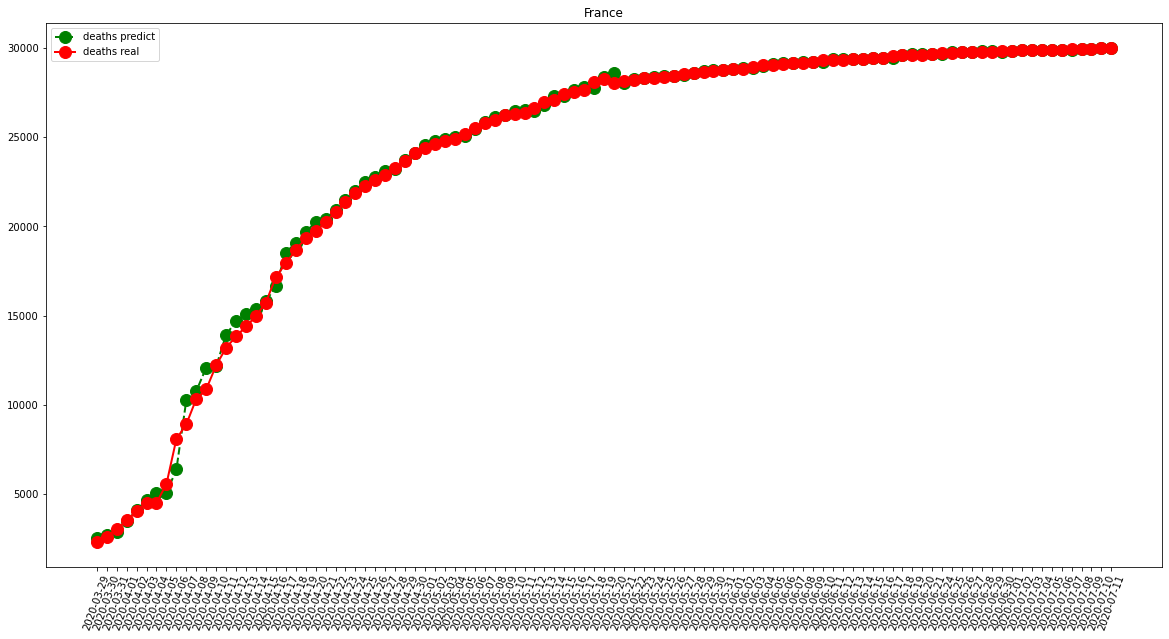

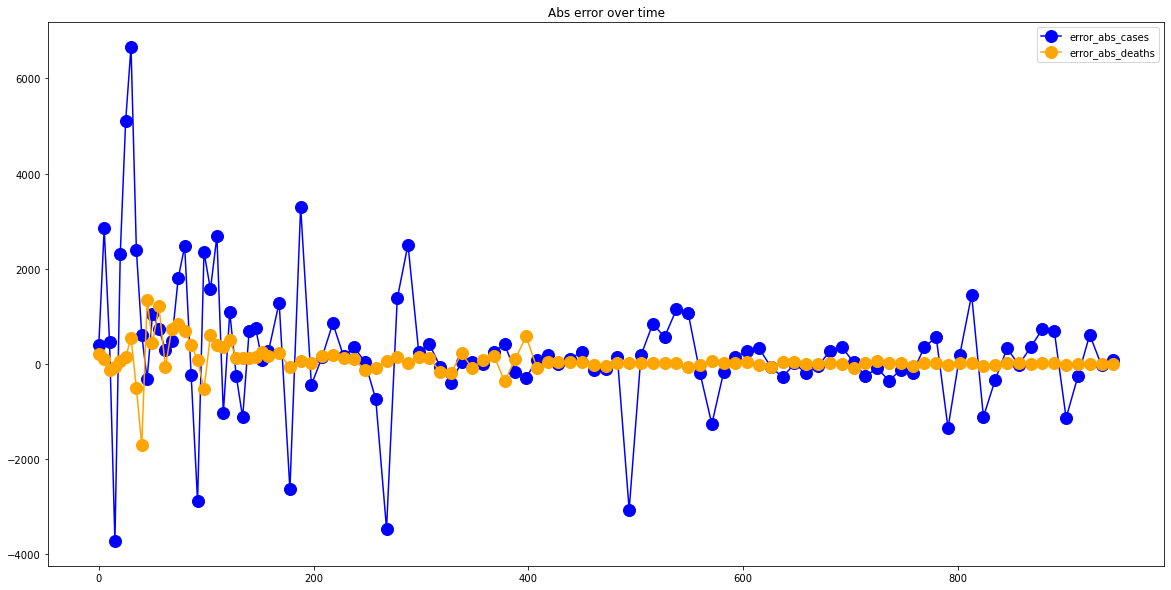

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  364.0
RMSE =  534.813532516808
-- Italy performances for deaths --
MAE =  95.41747572815534
RMSE =  291.4344170091716


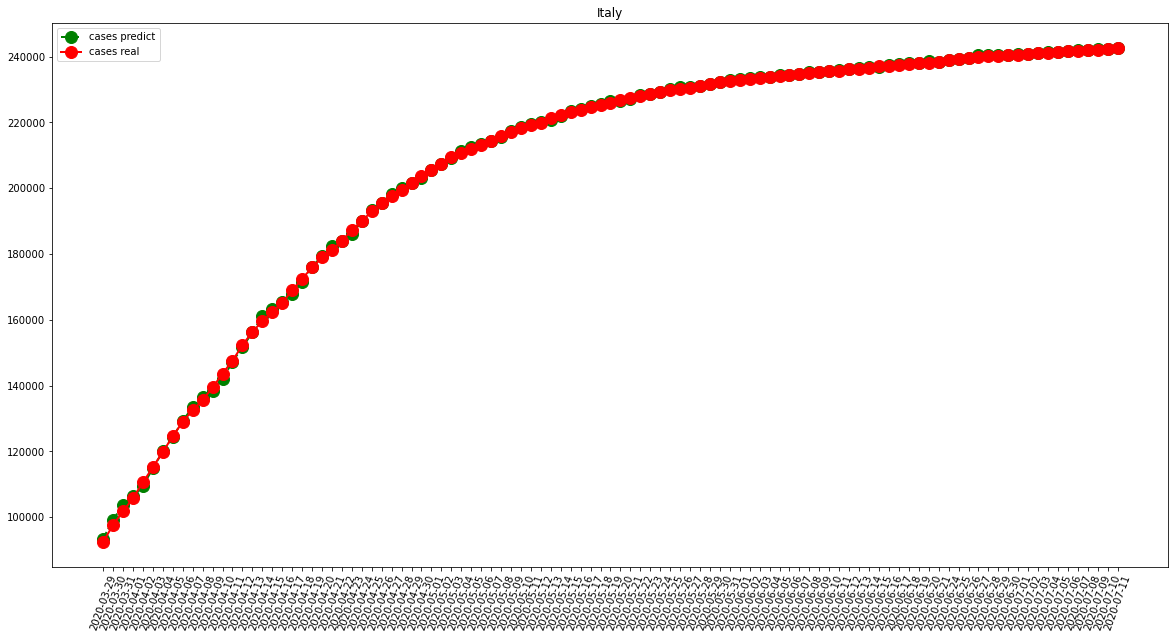

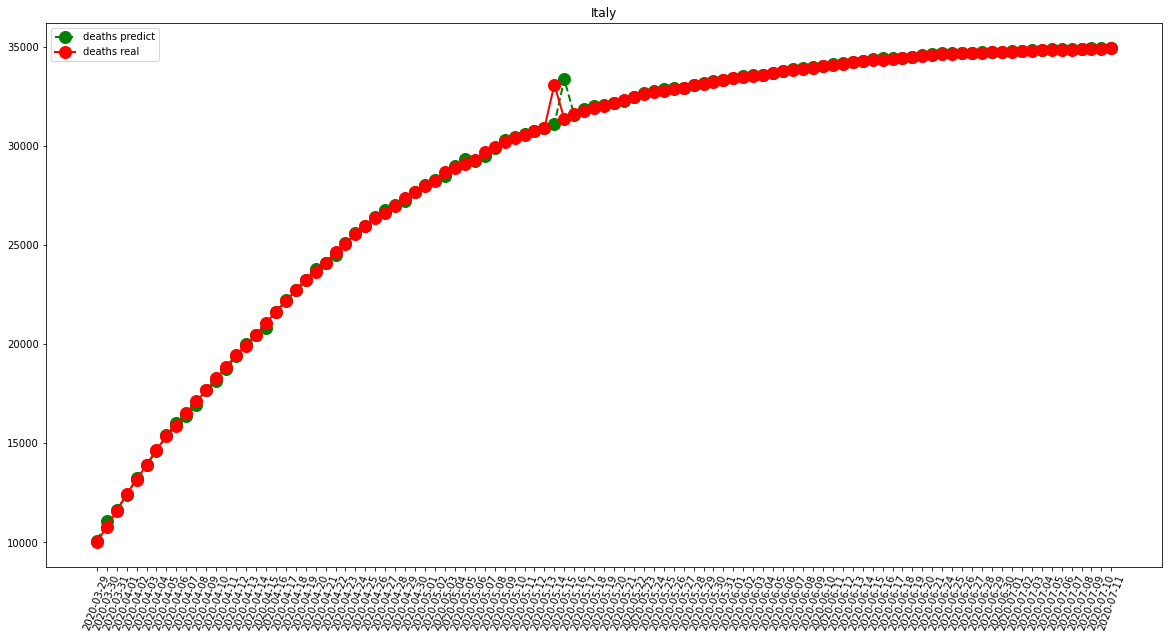

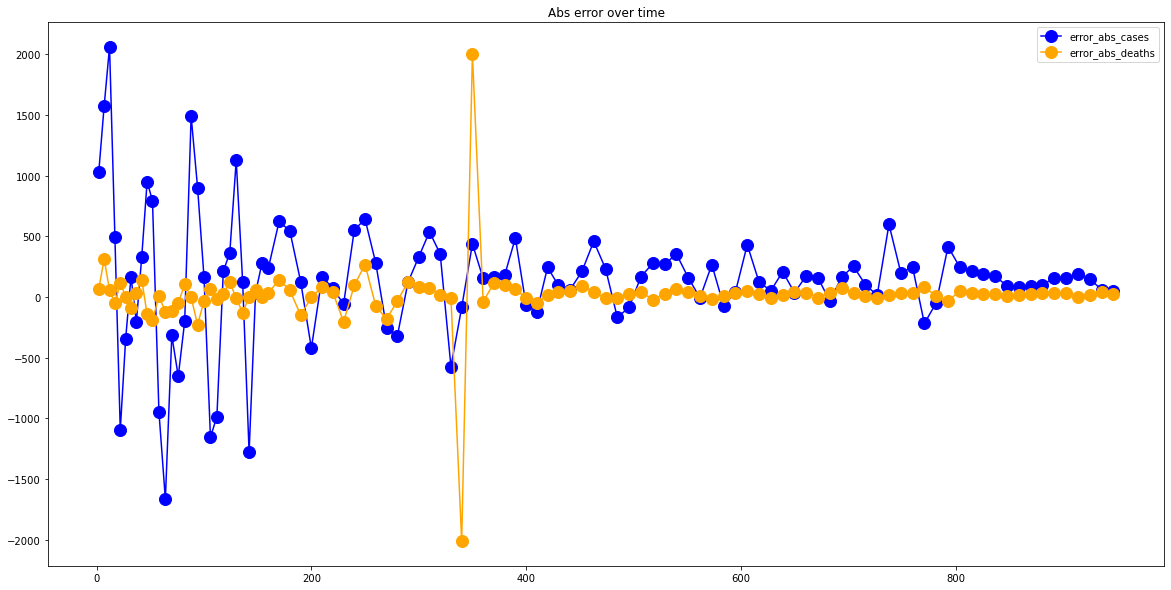

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  841.3300970873786
RMSE =  2020.3685115171681
-- Spain performances for deaths --
MAE =  176.5242718446602
RMSE =  399.93548023339287


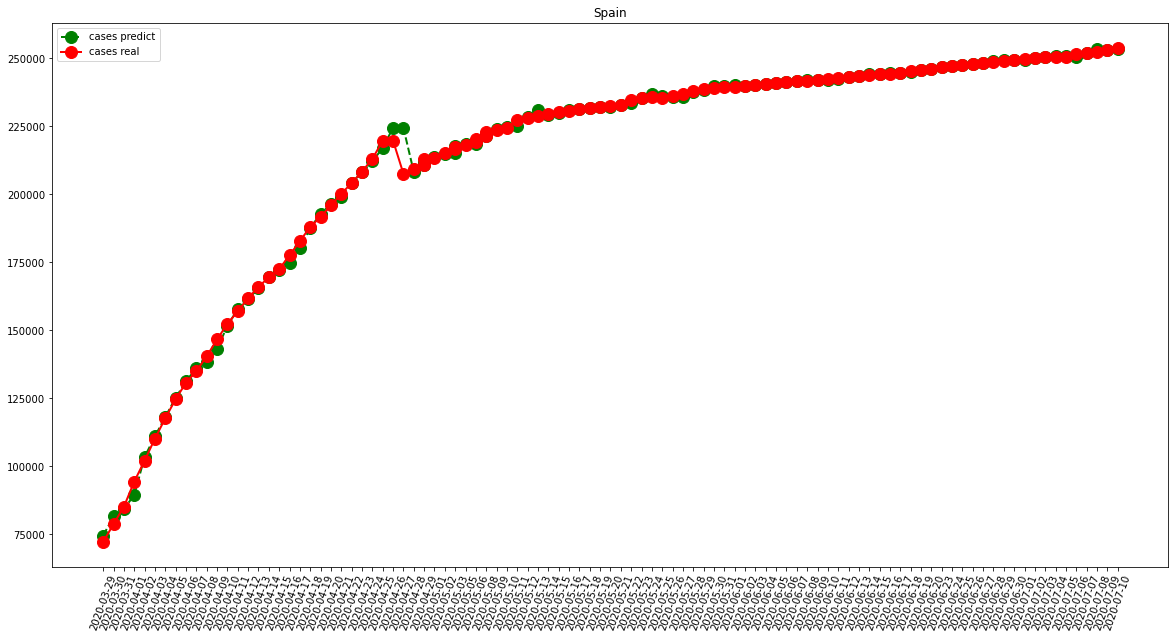

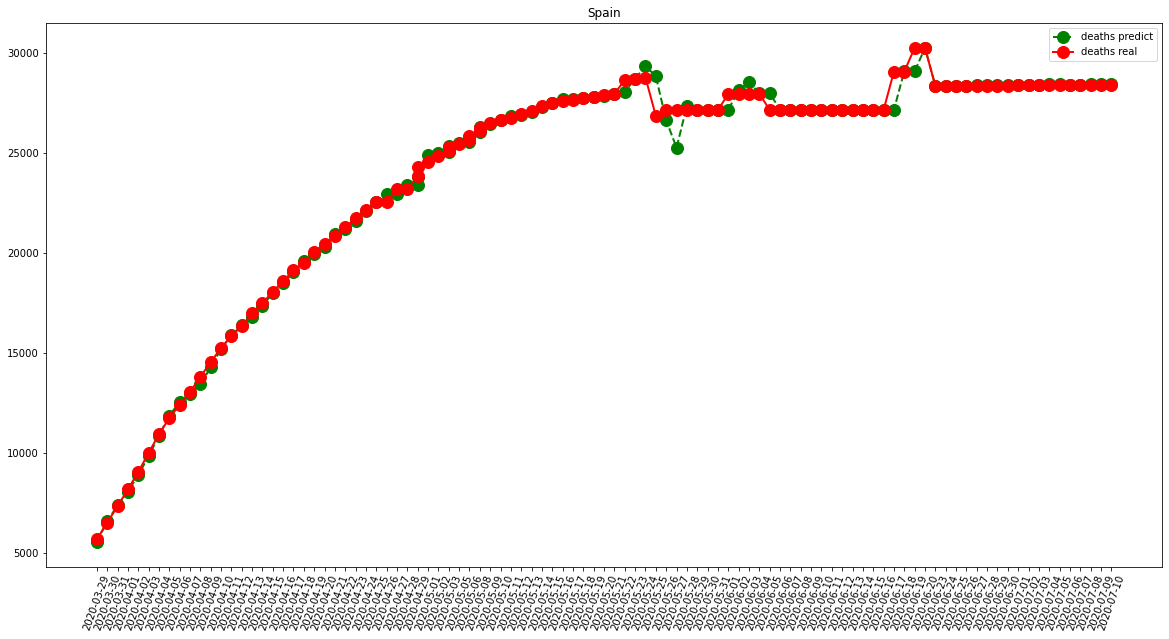

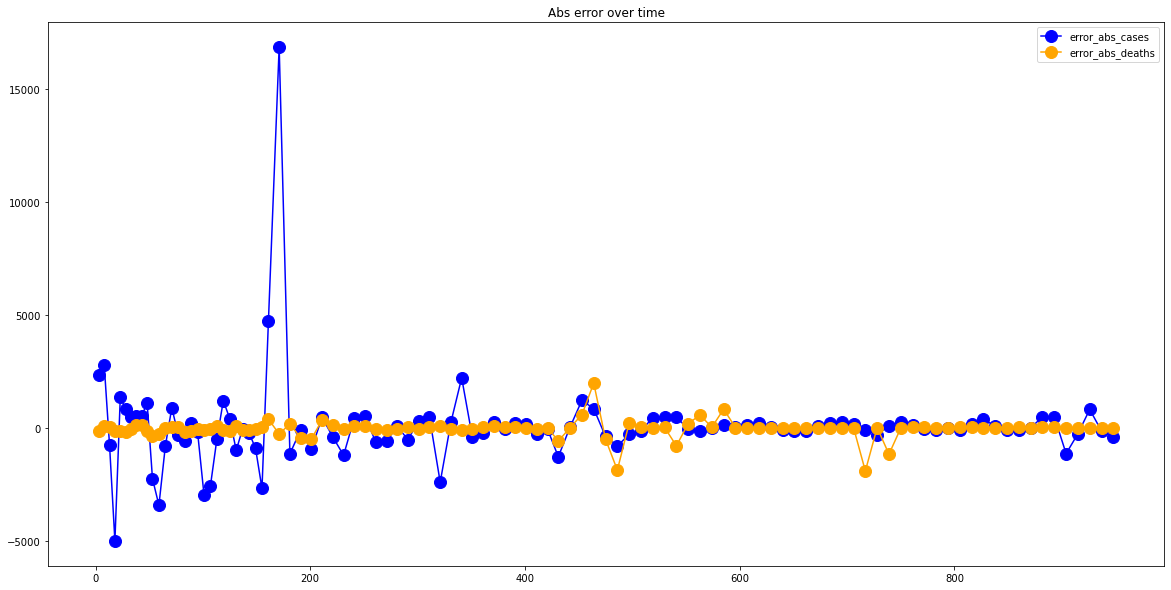

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5166.805825242718
RMSE =  7026.101908535501
-- United States performances for deaths --
MAE =  528.4854368932039
RMSE =  771.6509976251714


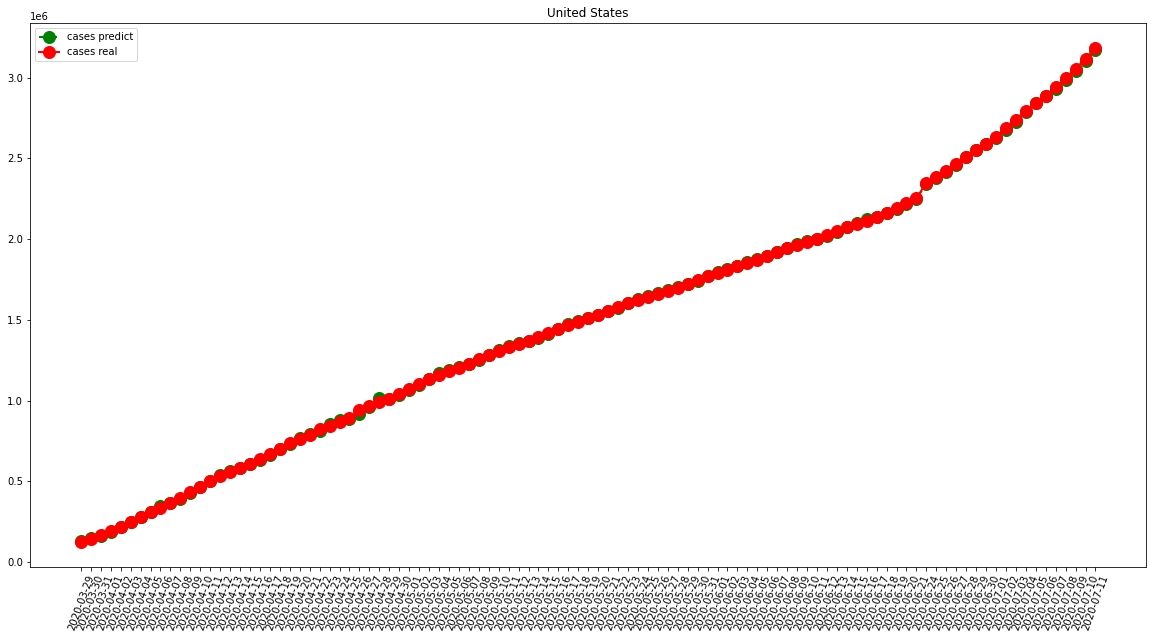

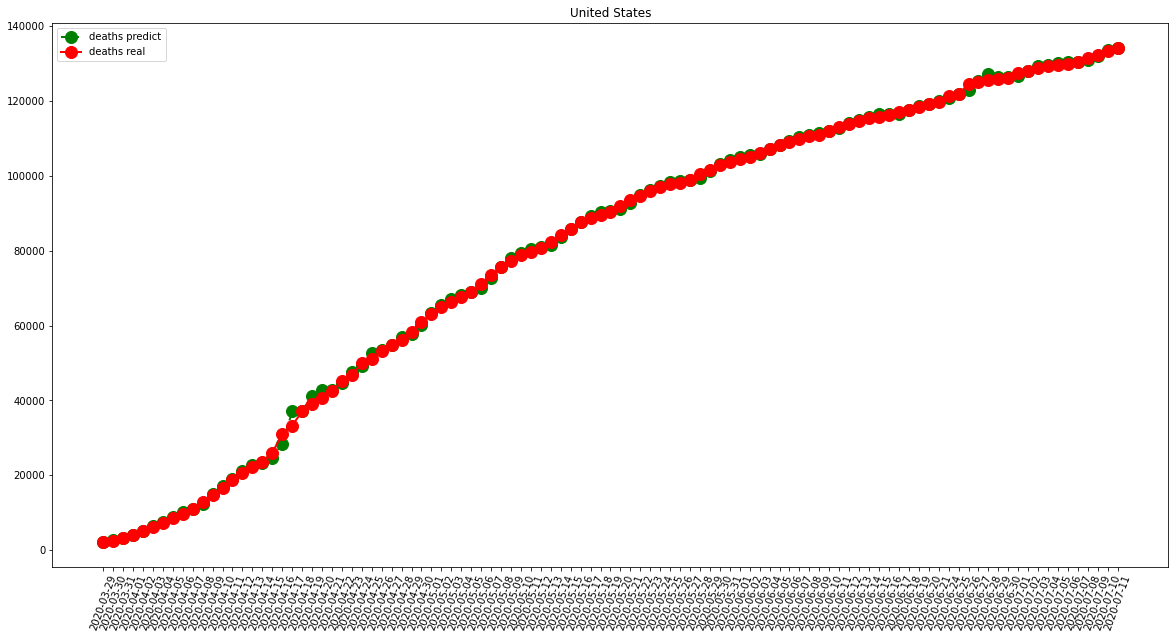

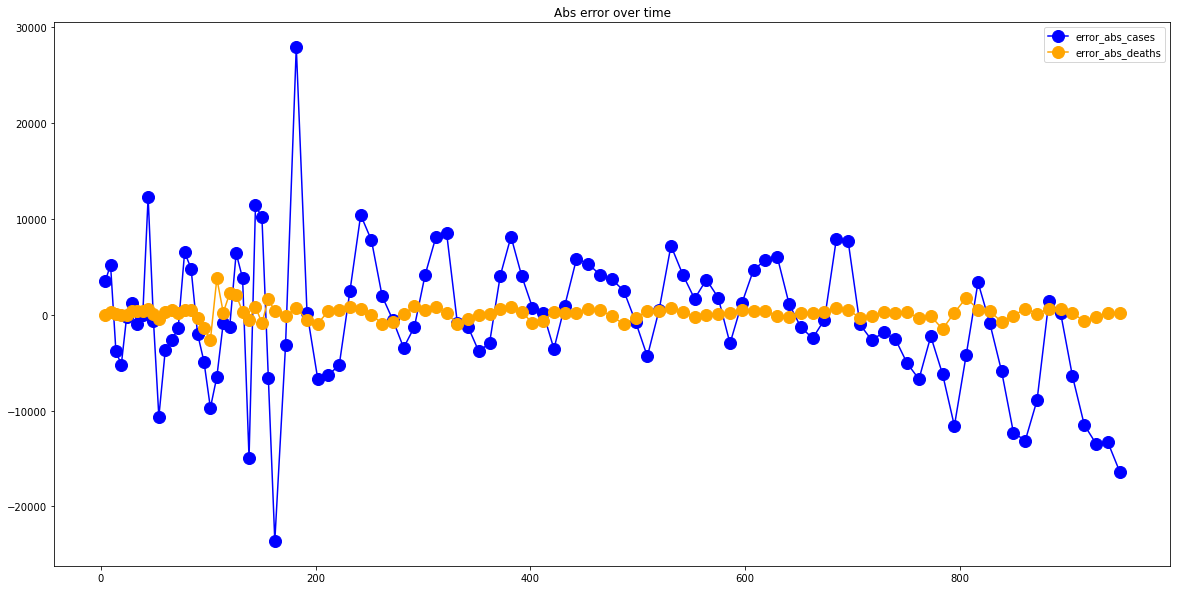

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  87.16504854368932
RMSE =  116.18774562323563
-- China performances for deaths --
MAE =  37.57281553398058
RMSE =  154.65627406217996


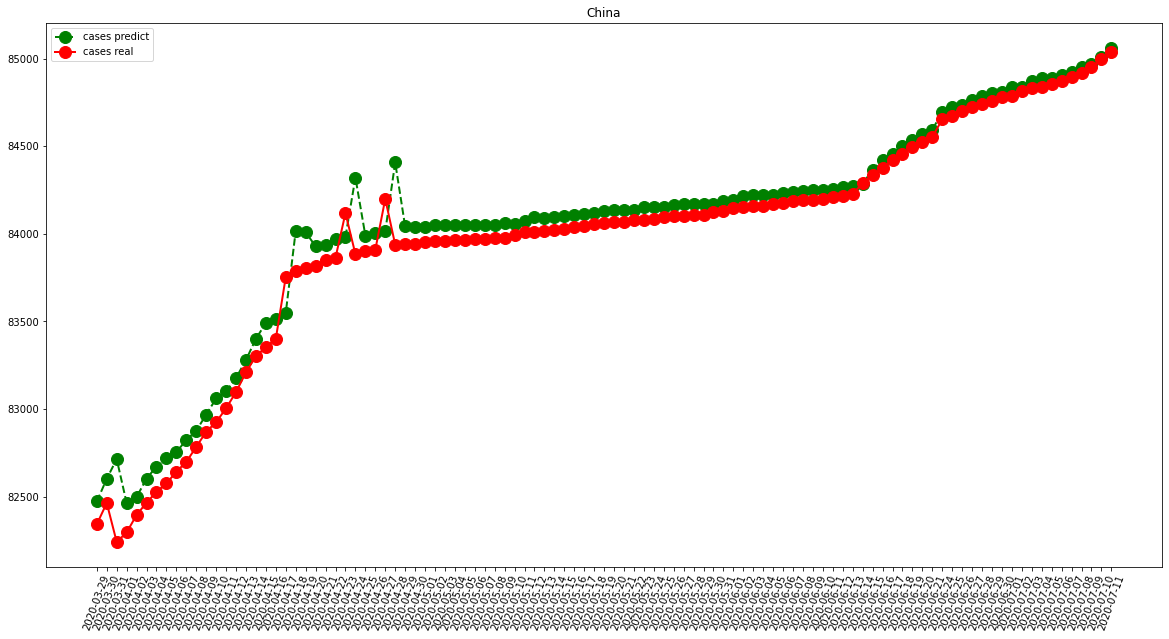

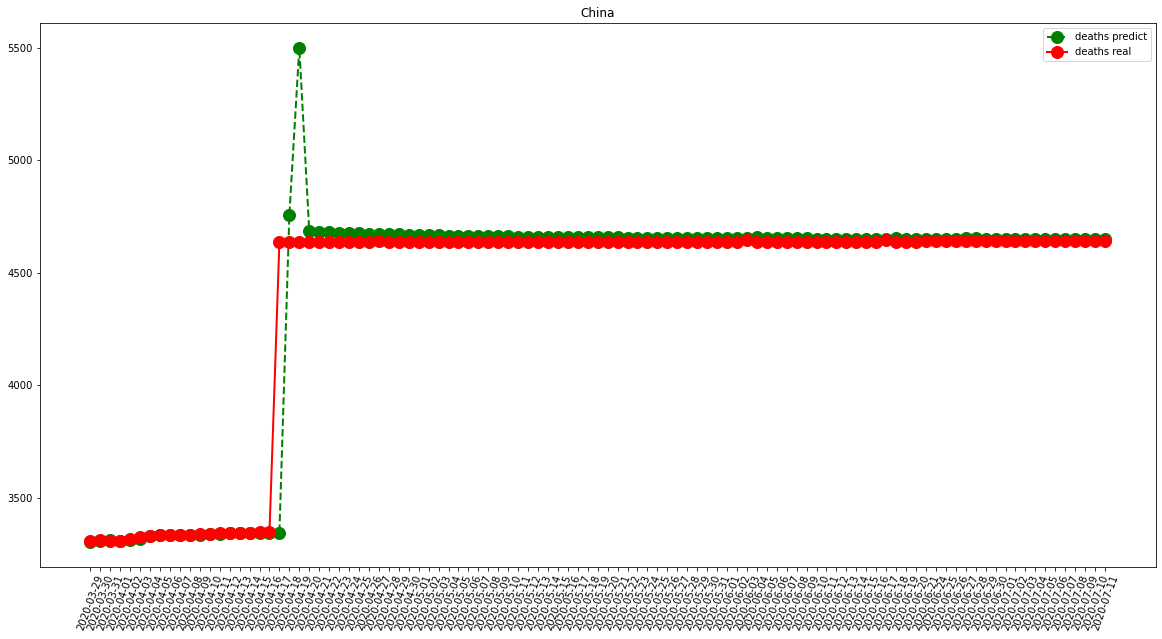

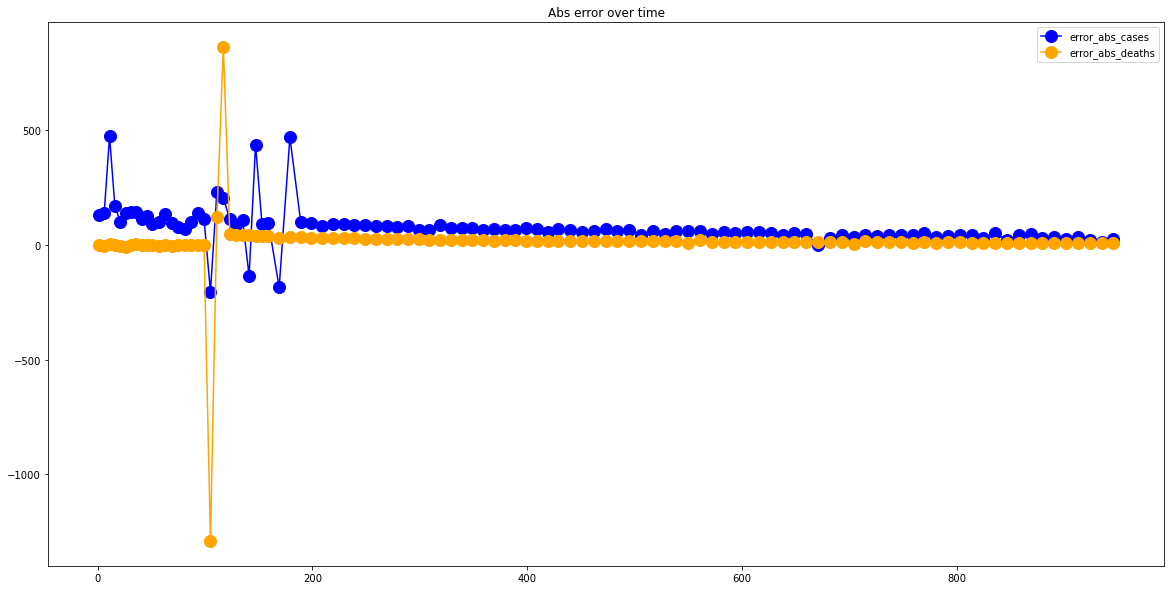

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1546.4133333333334
RMSE =  4815.608196963979
-- United Kingdom performances for deaths --
MAE =  237.64
RMSE =  565.0850201518352


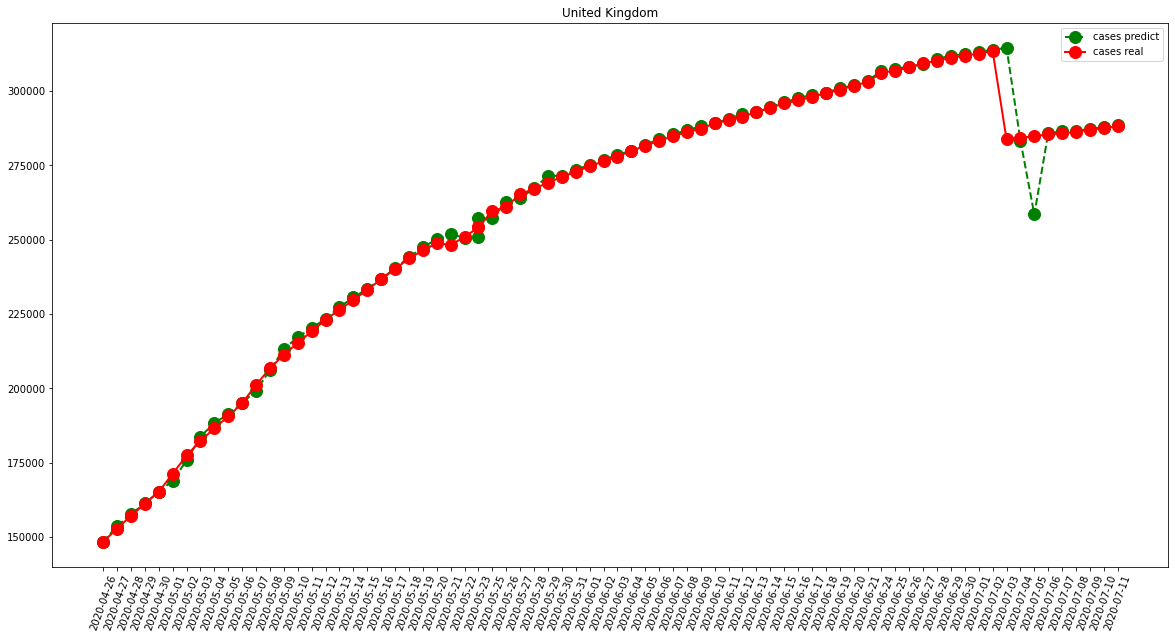

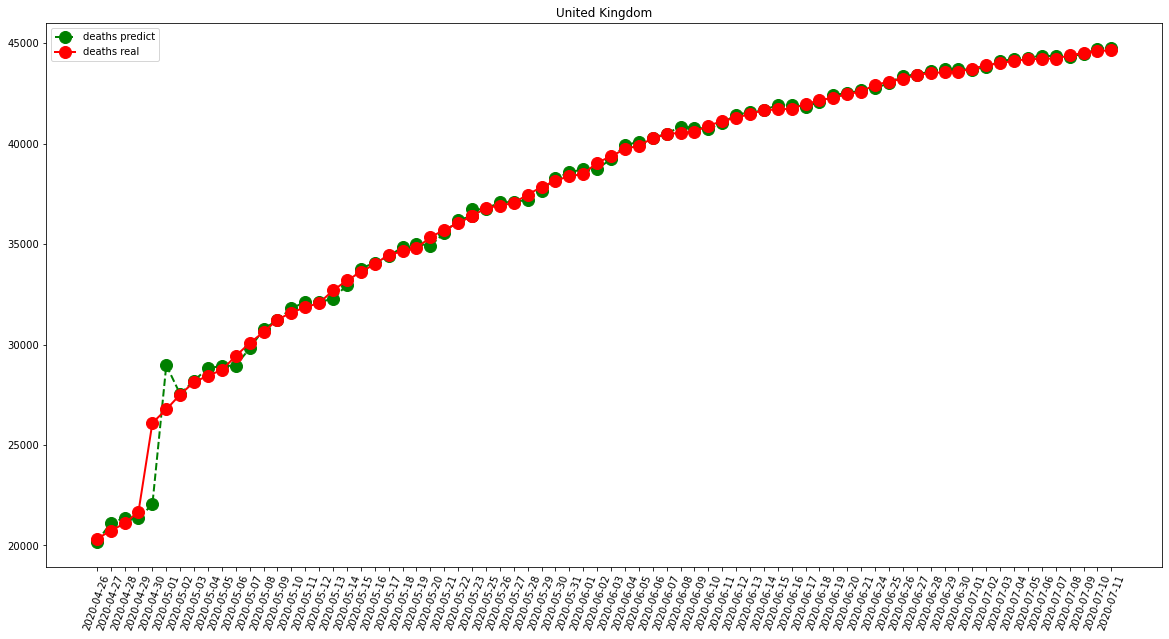

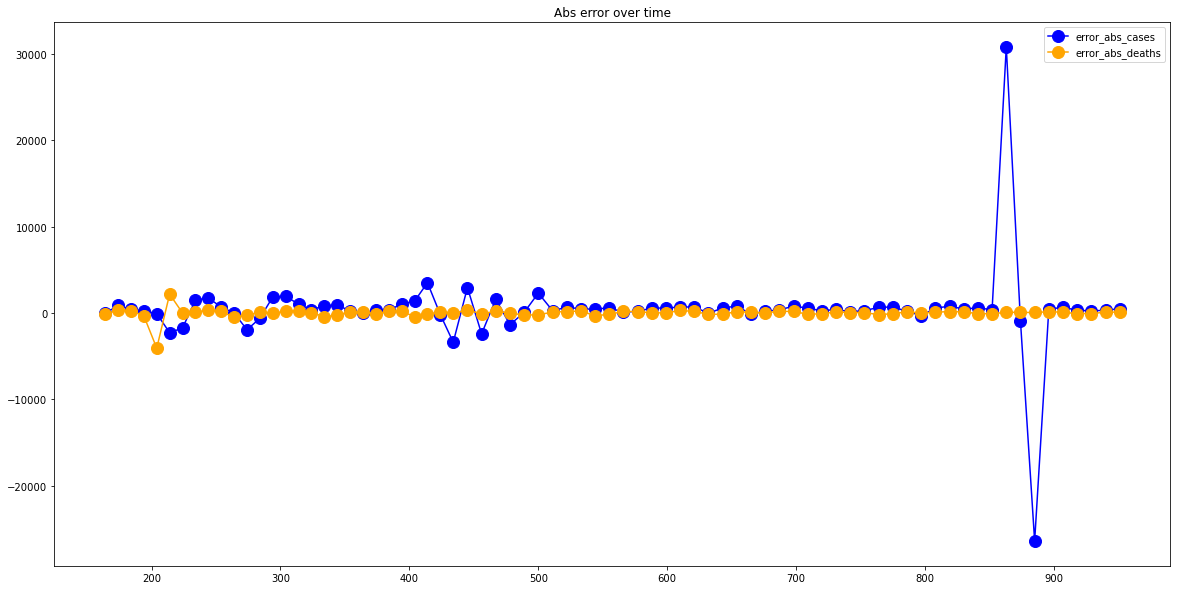

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  298.16
RMSE =  427.89419252894754
-- Germany performances for deaths --
MAE =  30.106666666666666
RMSE =  50.25216413250279


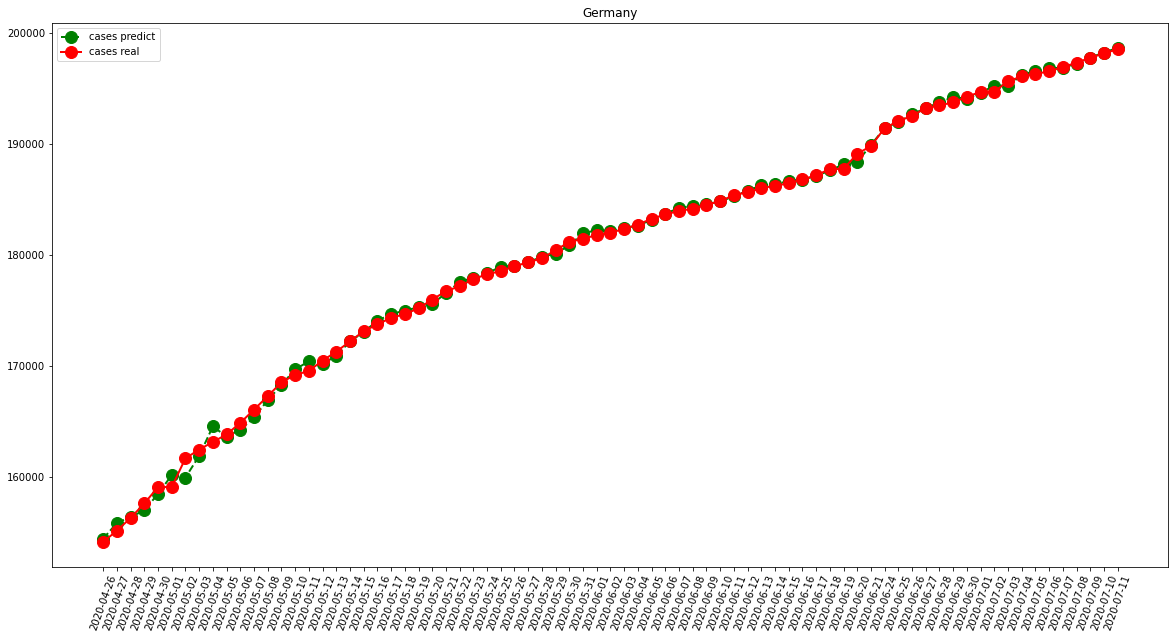

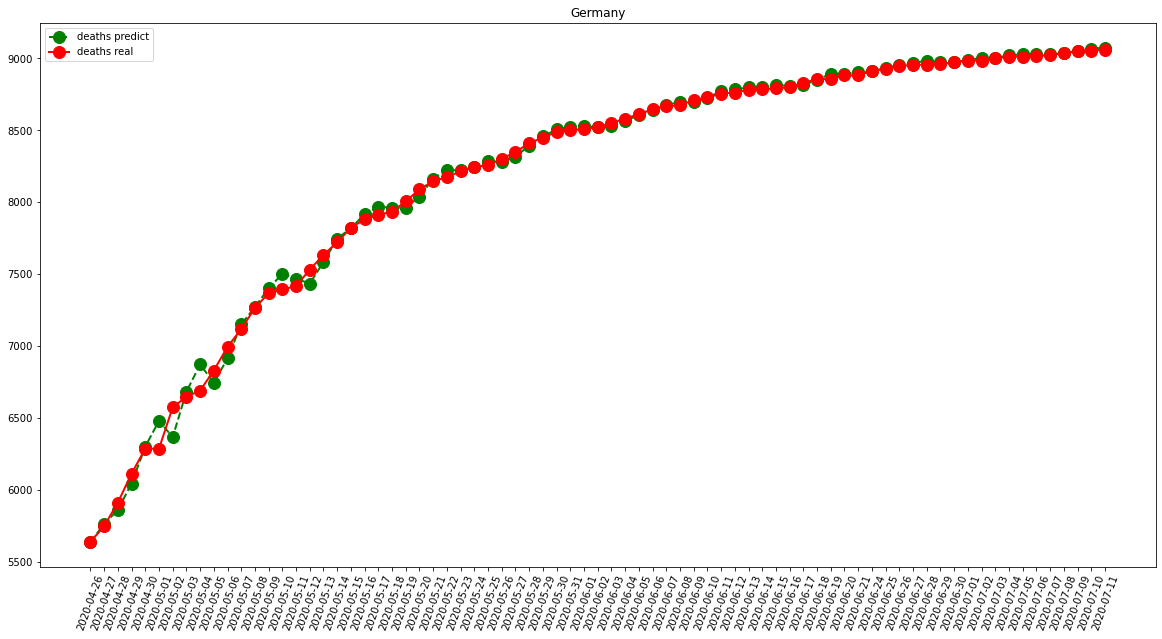

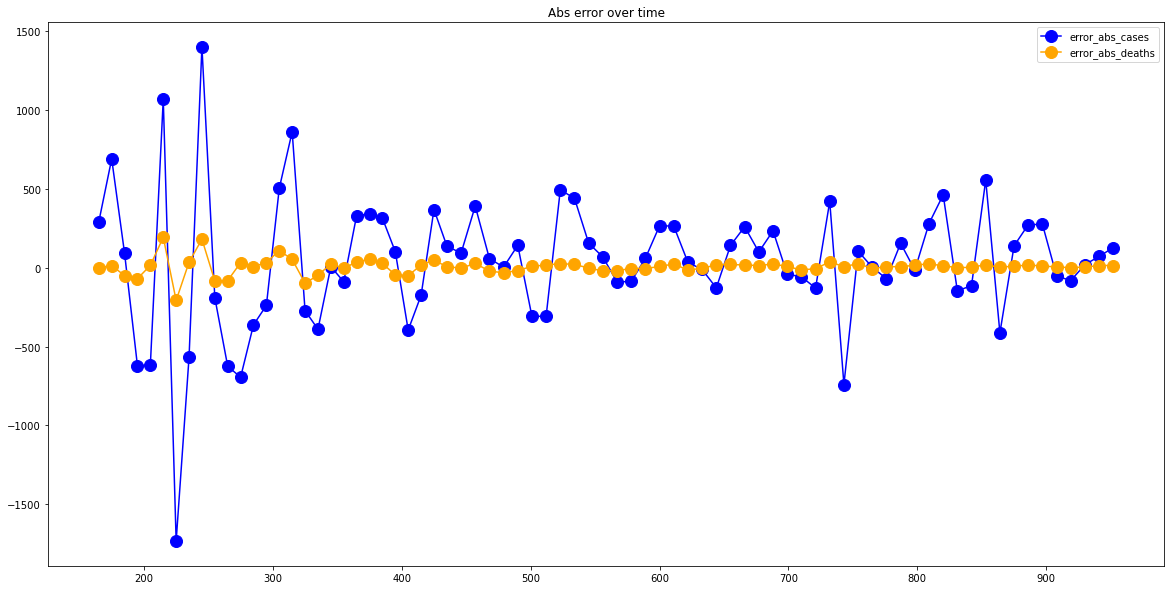

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  325.6666666666667
RMSE =  421.94121233492547
-- Iran performances for deaths --
MAE =  18.453333333333333
RMSE =  29.484459183327974


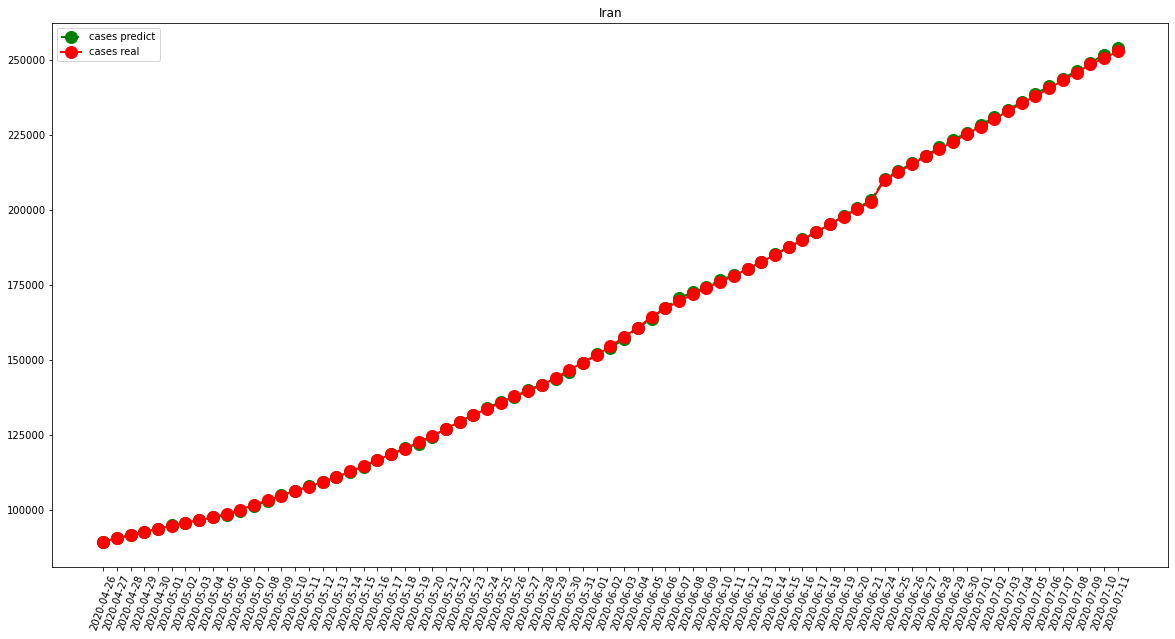

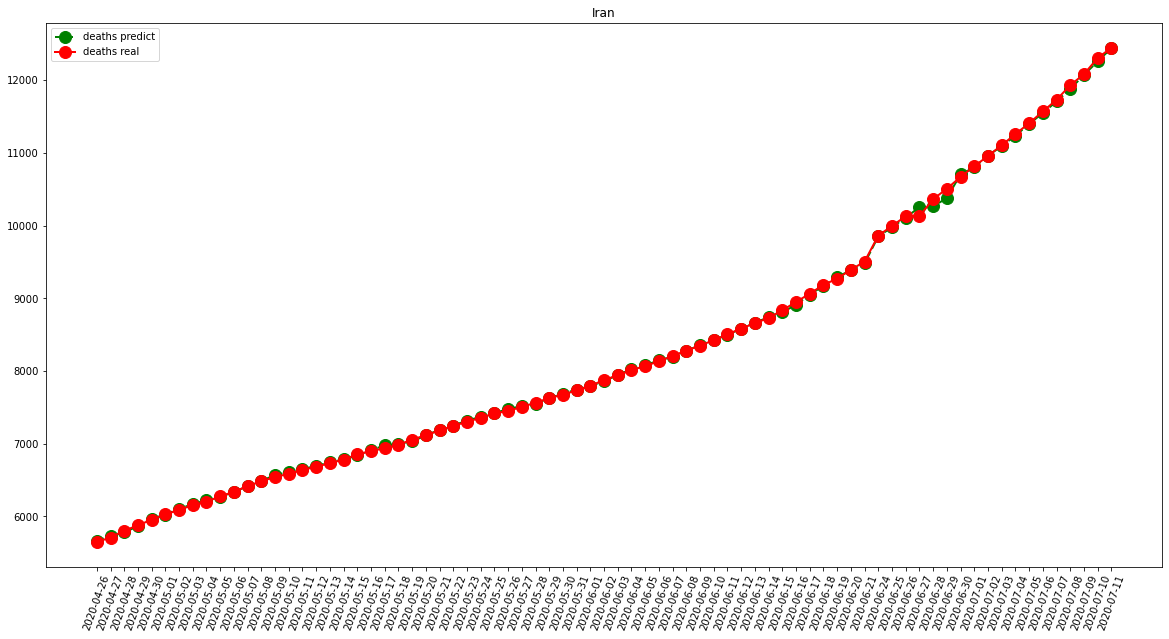

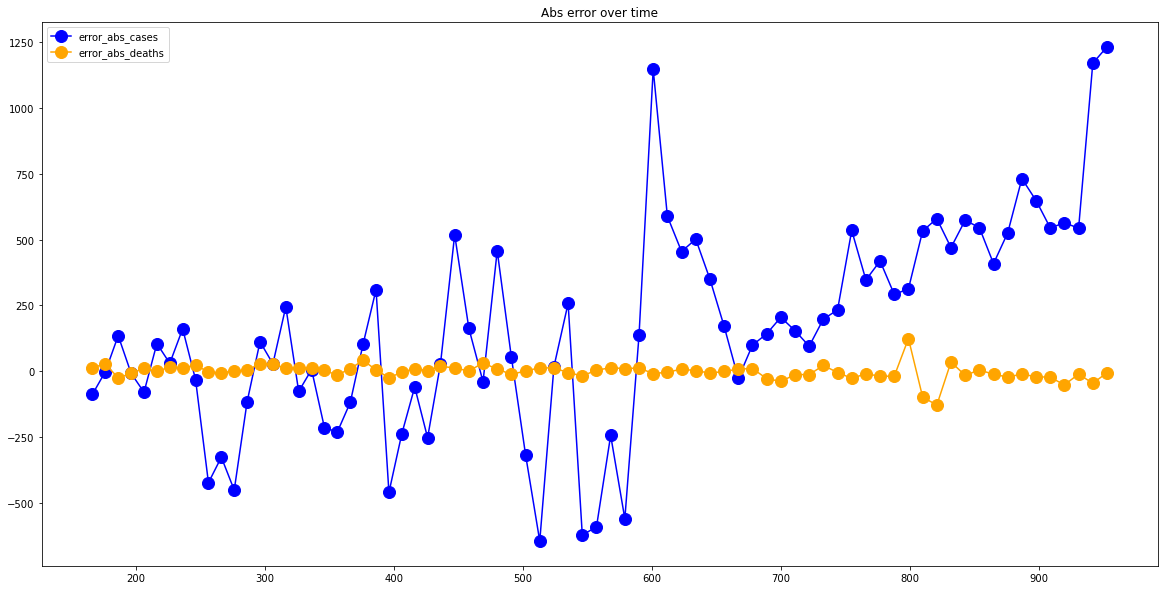

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  249.24
RMSE =  396.4952963151013
-- Turkey performances for deaths --
MAE =  24.64
RMSE =  117.20728077498713


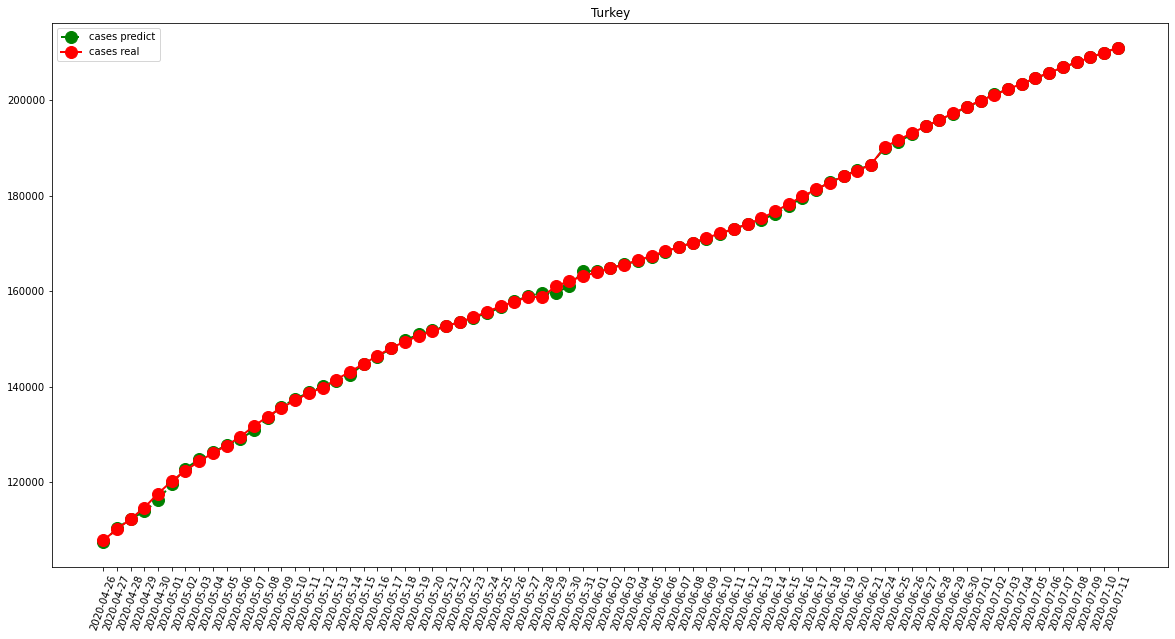

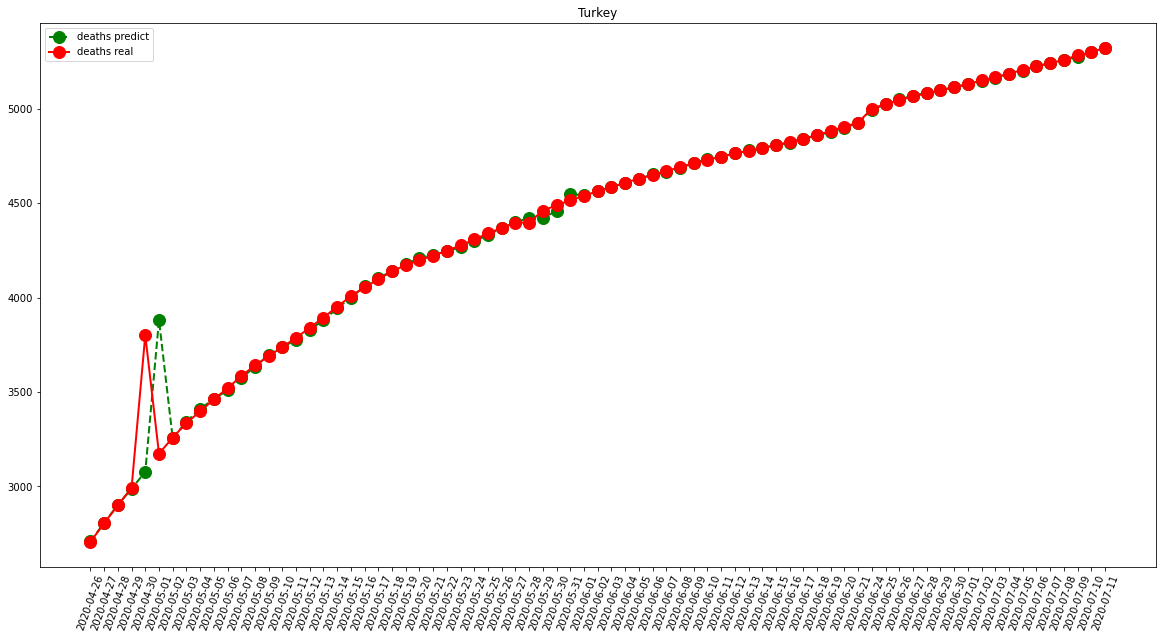

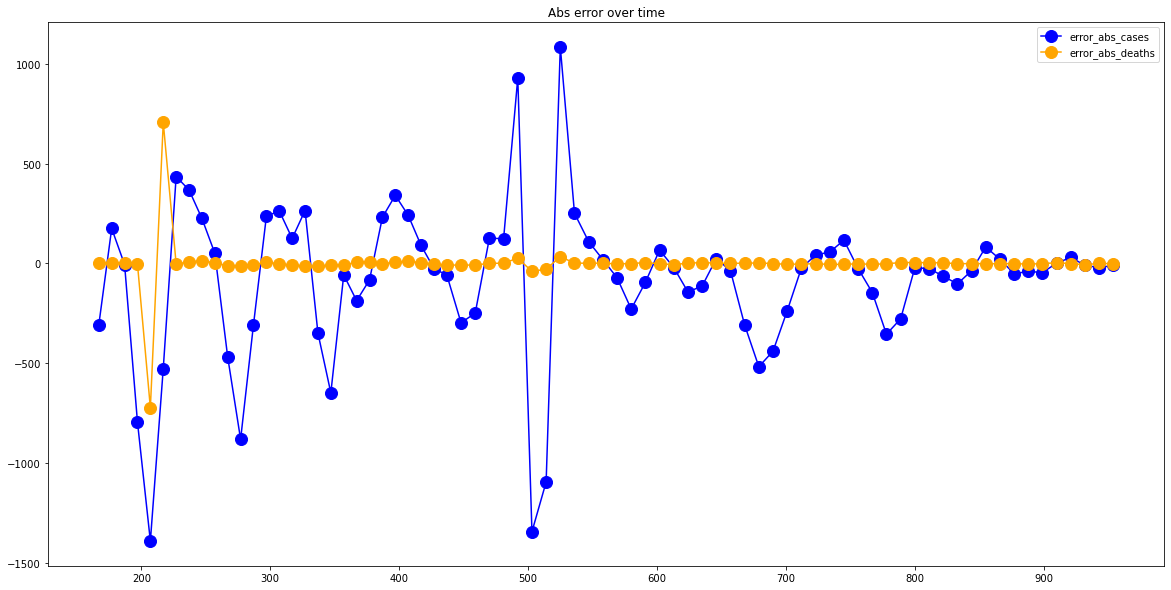

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9081.354166666666
RMSE =  11772.649424796726
-- Brazil performances for deaths --
MAE =  367.3125
RMSE =  457.70298320344534


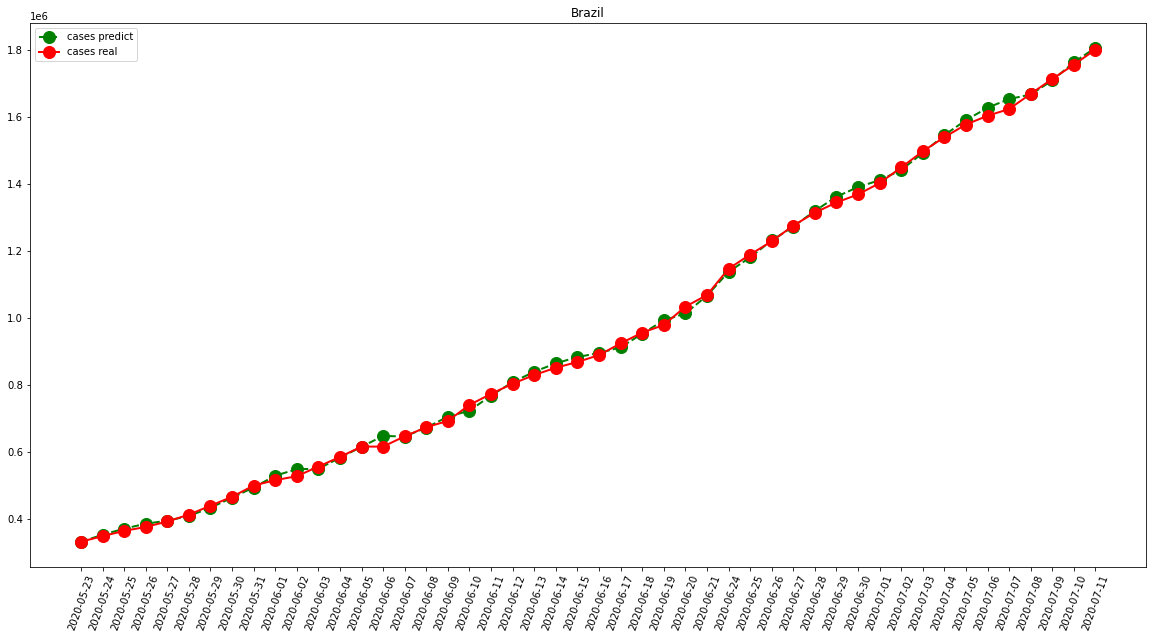

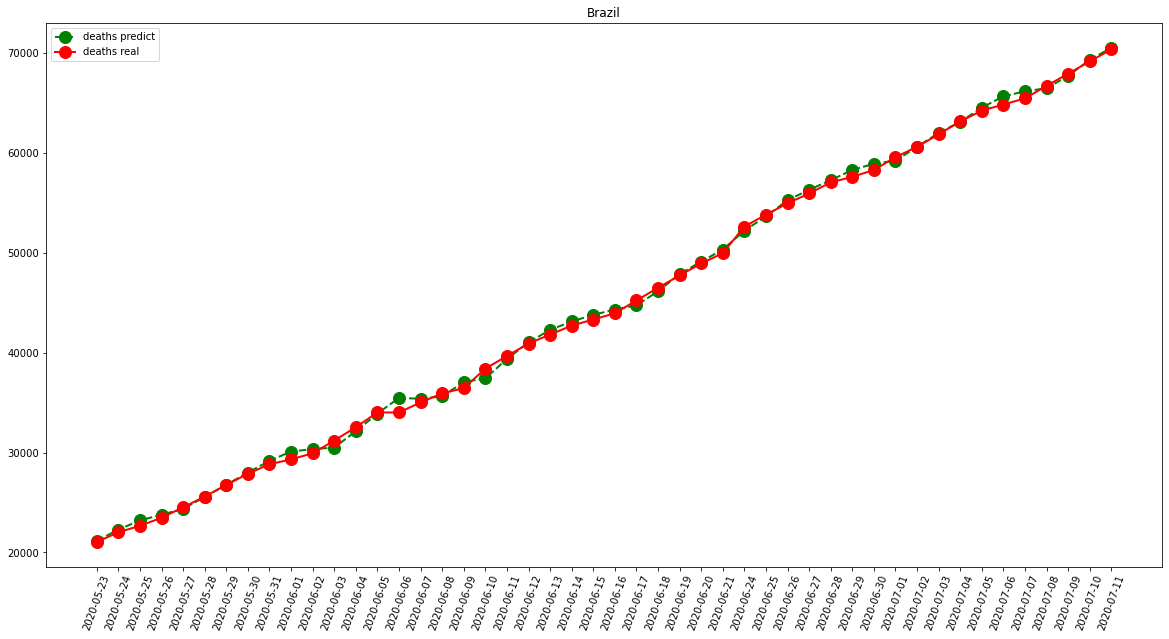

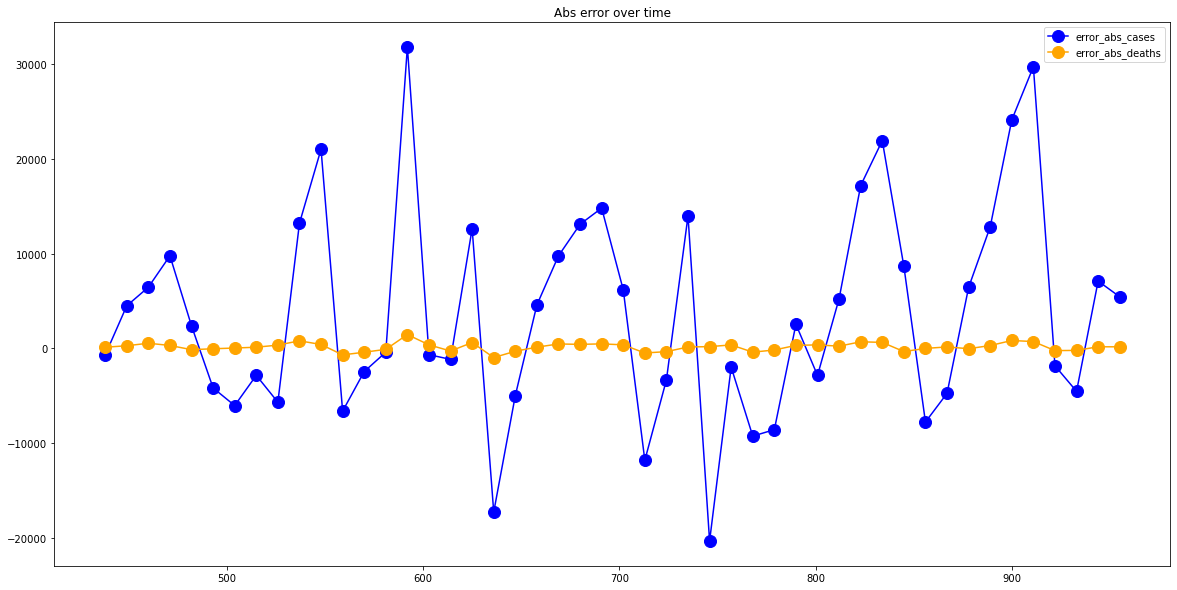

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)